# evaluation on softmax regression results

In [1]:
import pickle
from pathlib import Path
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

from param import *

sns.set_theme(style="whitegrid")
output_dir = ParamDir().output_dir
datalist = ParamDir().data_path_list

## Accuracy

### no upsampling

091317 OF CaMKII HKO M19-n1
092217 OF CaMKII HKO M30-n1
M45_042718_OF
091317 OF CaMKII HKO M20-n1
M46_042718_OF
CK_KO_RN1_OF
CK_WT_RN3_OF
090817 OF CaMKII HKO M22-n1
092217 OF CaMKII WT M29-n1
M44_042718_OF
092717 OF SERT WT M32-n1
081117 OF B6J M27-n1


Text(0, 0.5, 'accuracy')

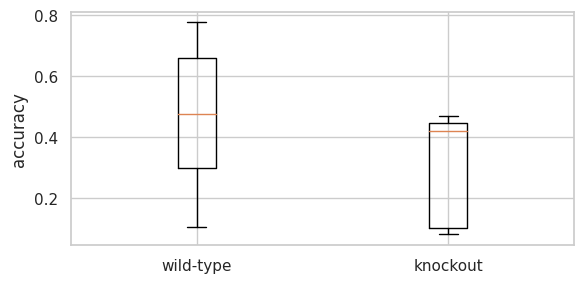

In [12]:
accu_KO, accu_WT = [], []
for m_id, data_dir in enumerate(datalist):
    data_name = str(data_dir).split('/')[-1]
    print(data_name)
    with open(ParamDir().output_dir/data_name/(f"sm_evaluation_firing_rate.pickle"),"rb") as f:
        results = pickle.load(f)
    accu = np.sum((results["y_test"]==results["y_pred"]))/len(results["y_pred"])
    if "KO" in data_name:
        accu_KO.append(accu)
    else:
        accu_WT.append(accu)

fig, ax = plt.subplots(figsize=(6,3), tight_layout = True)
ax.boxplot([accu_WT, accu_KO])
ax.set_xticklabels(['wild-type', 'knockout'])
ax.set_ylabel("accuracy")


### with upsampling

091317 OF CaMKII HKO M19-n1
092217 OF CaMKII HKO M30-n1
M45_042718_OF
091317 OF CaMKII HKO M20-n1
M46_042718_OF
CK_KO_RN1_OF
CK_WT_RN3_OF
090817 OF CaMKII HKO M22-n1
092217 OF CaMKII WT M29-n1
M44_042718_OF
092717 OF SERT WT M32-n1
081117 OF B6J M27-n1


Text(0, 0.5, 'accuracy')

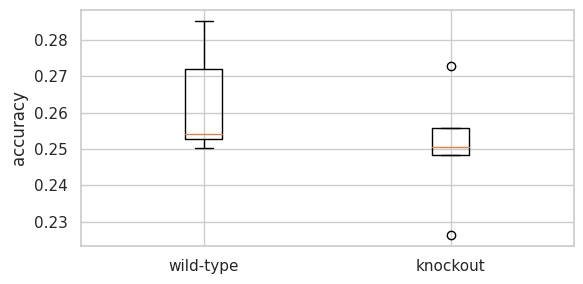

In [22]:
accu_KO, accu_WT = [], []
for m_id, data_dir in enumerate(datalist):
    data_name = str(data_dir).split('/')[-1]
    print(data_name)
    with open(ParamDir().output_dir/data_name/(f"sm_evaluation_firing_rate.pickle"),"rb") as f:
        results = pickle.load(f)
    accu = np.sum((results["y_test"]==results["y_pred"]))/len(results["y_pred"])
    if "KO" in data_name:
        accu_KO.append(accu)
    else:
        accu_WT.append(accu)

fig, ax = plt.subplots(figsize=(6,3), tight_layout = True)
ax.boxplot([accu_WT, accu_KO])
ax.set_xticklabels(['wild-type', 'knockout'])
ax.set_ylabel("accuracy")


## confusion matrix

### without upsampling

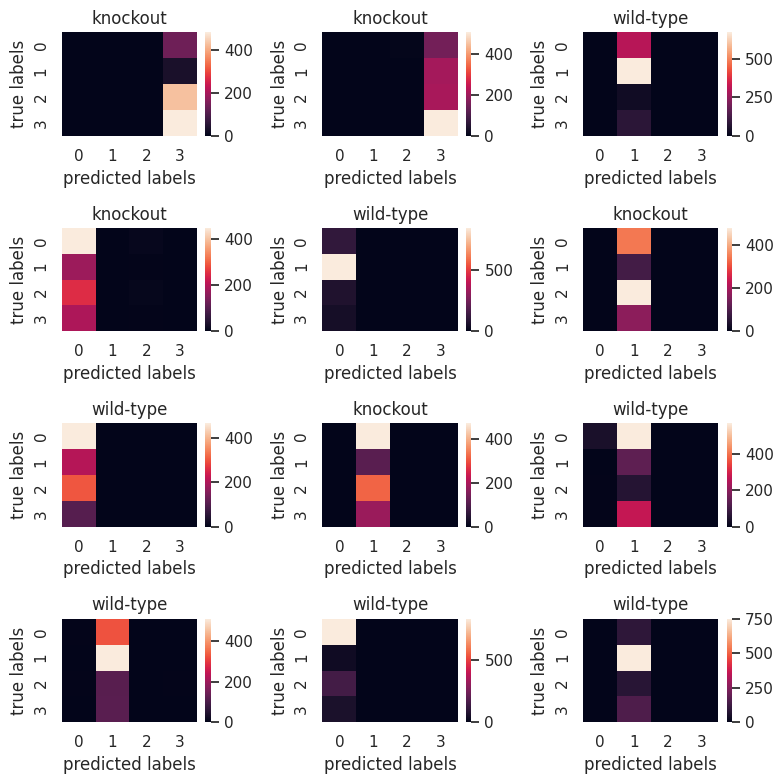

In [21]:
fig, axes = plt.subplots(figsize=(8,8),nrows = 4, ncols = 3, tight_layout = True)
axes = axes.ravel()

for id_, data_dir in enumerate(ParamDir().data_path_list):
    data_name = str(data_dir).split('/')[-1]
    with open(ParamDir().output_dir/data_name/(f"sm_evaluation_firing_rate.pickle"),"rb") as f:
        results = pickle.load(f)
    sns.heatmap(confusion_matrix(results["y_test"], results["y_pred"]), ax=axes[id_])
    axes[id_].set_xlabel("predicted labels")
    axes[id_].set_ylabel("true labels")
    if "KO" in str(data_dir):
        mouse_type = "knockout"
    else:
        mouse_type = "wild-type"
    axes[id_].set_title(mouse_type)

### with upsampling

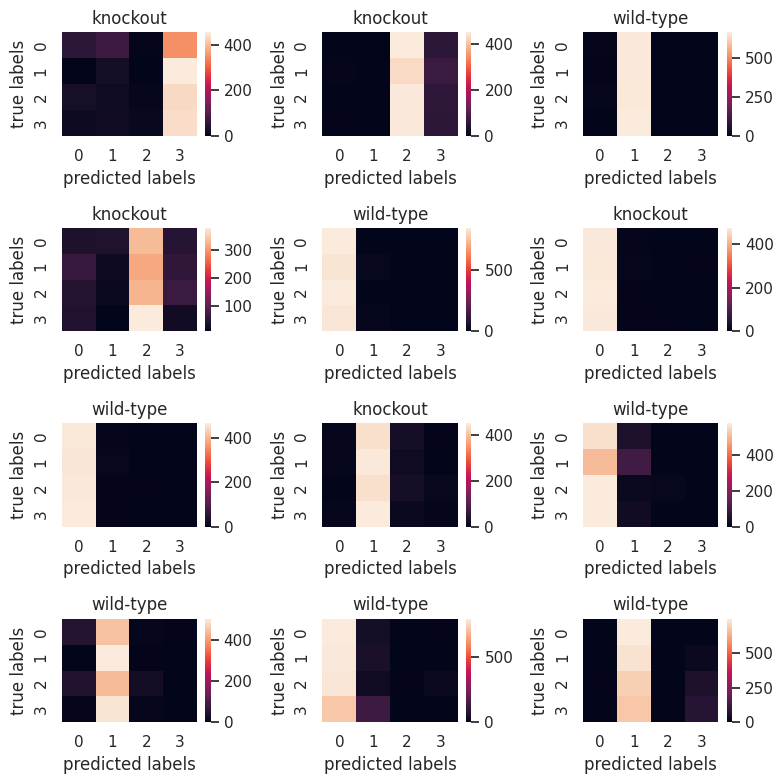

In [23]:
fig, axes = plt.subplots(figsize=(8,8),nrows = 4, ncols = 3, tight_layout = True)
axes = axes.ravel()

for id_, data_dir in enumerate(ParamDir().data_path_list):
    data_name = str(data_dir).split('/')[-1]
    with open(ParamDir().output_dir/data_name/(f"sm_evaluation_firing_rate.pickle"),"rb") as f:
        results = pickle.load(f)
    sns.heatmap(confusion_matrix(results["y_test"], results["y_pred"]), ax=axes[id_])
    axes[id_].set_xlabel("predicted labels")
    axes[id_].set_ylabel("true labels")
    if "KO" in str(data_dir):
        mouse_type = "knockout"
    else:
        mouse_type = "wild-type"
    axes[id_].set_title(mouse_type)